# Climate Change Prediction
Main Production-ready code.

In [78]:
import numpy as np                                # Load the numpy for more advanced mathamatics
import pandas as pd                               # Load the pandas for preprocessing data
import matplotlib.pyplot as plt                   # Load Matplotlib for graphying and plotting
import copy                                       # Load copy for deep copying data
from sklearn.linear_model import LinearRegression # Load scikit learn for the Linear Regression model
from sklearn.model_selection import train_test_split

# Data PreProcessing

In [79]:
df = pd.read_csv('data2.csv')    # Load the data.csv
df = df.drop(["J-D", "D-N", "DJF", "MAM", "JJA", "SON"], axis=1)
df = df.ffill()
df.set_index('Year', inplace=True)
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19
1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07
1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36
1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11
1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31


In [80]:
month = 'Feb'

Plot all the data columns

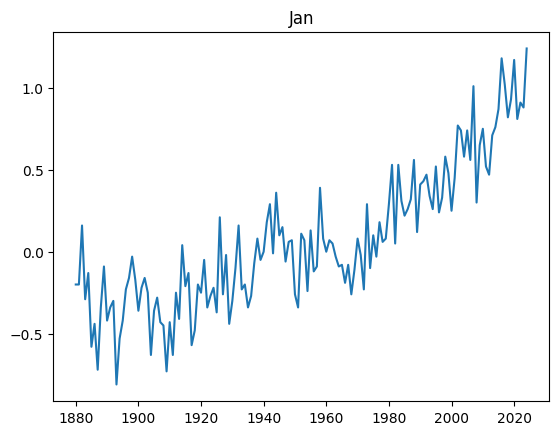

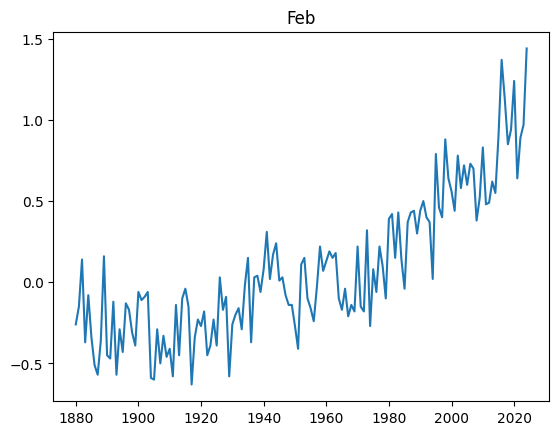

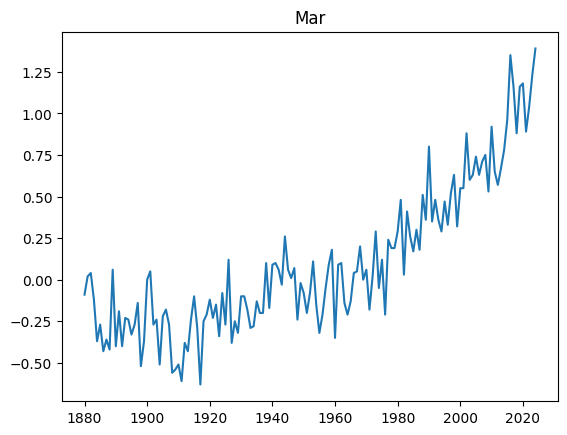

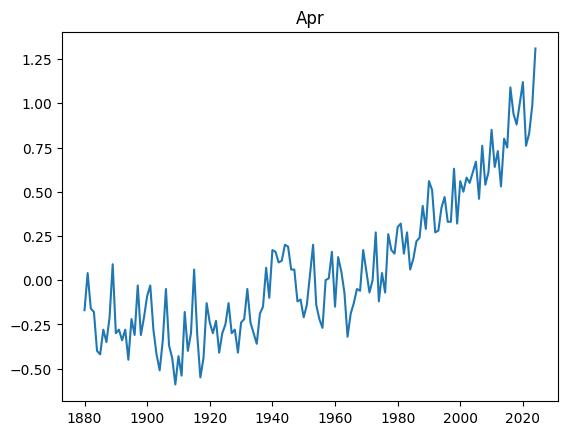

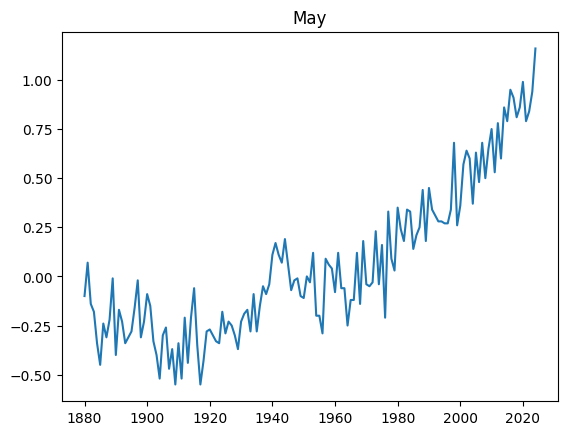

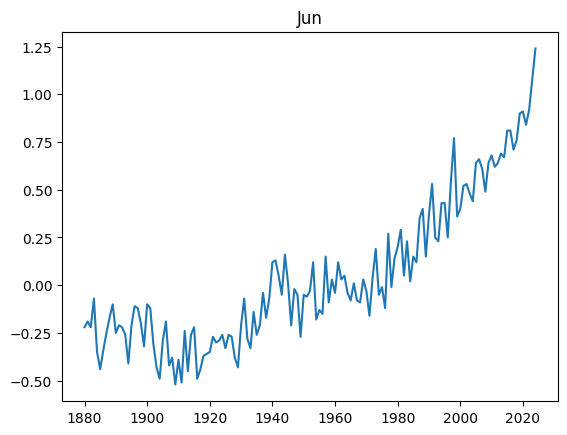

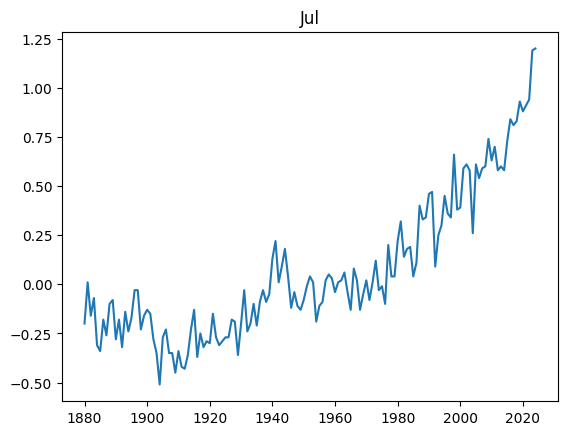

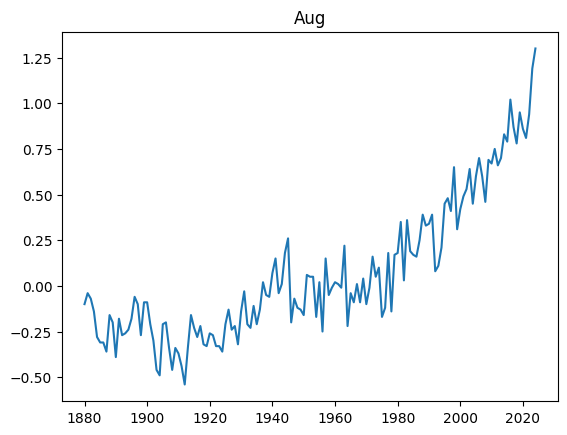

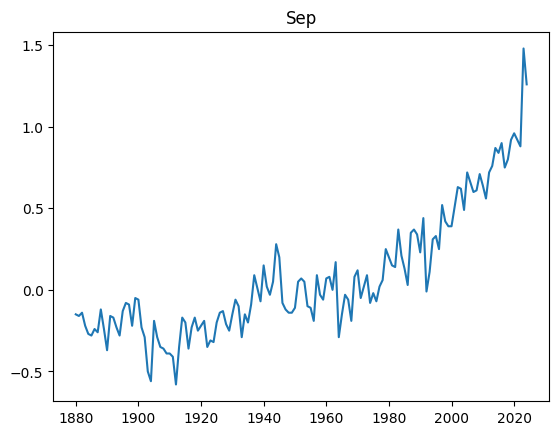

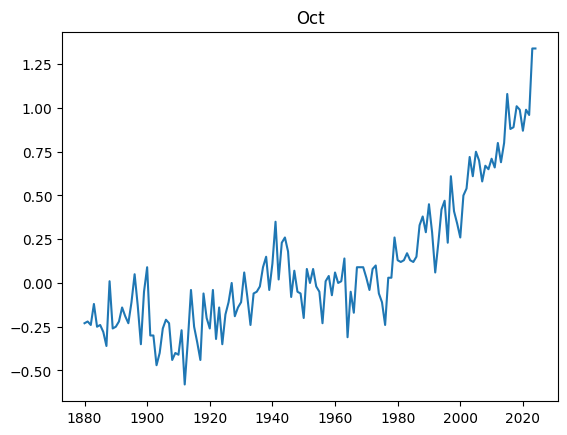

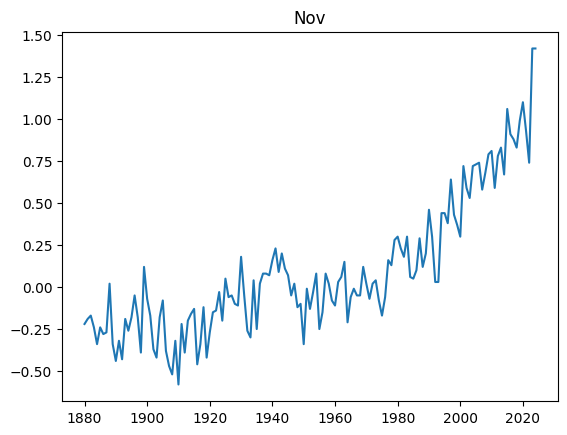

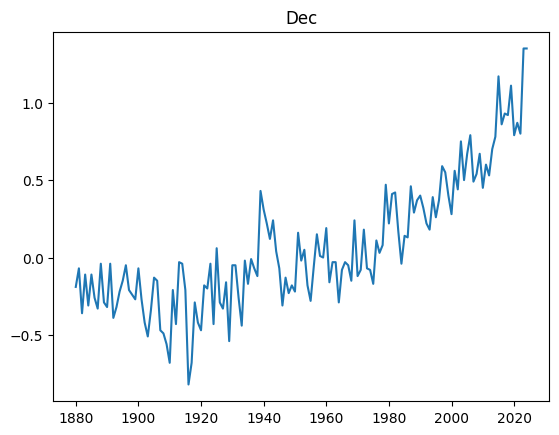

In [81]:
columns = df.columns
for i in columns:
    plt.figure()
    plt.plot(df[i])
    plt.title(f"{i}")
    # Run this if you don't have all the charts for months-> plt.savefig(f"chart_{i}.png")

# Predict and Create Graphs

Predict from the X testing dataset.

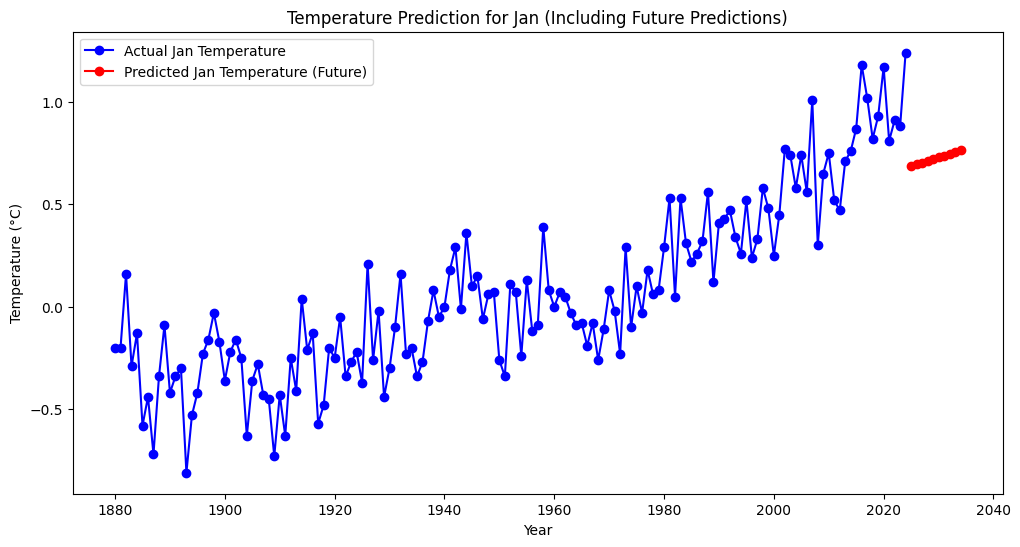

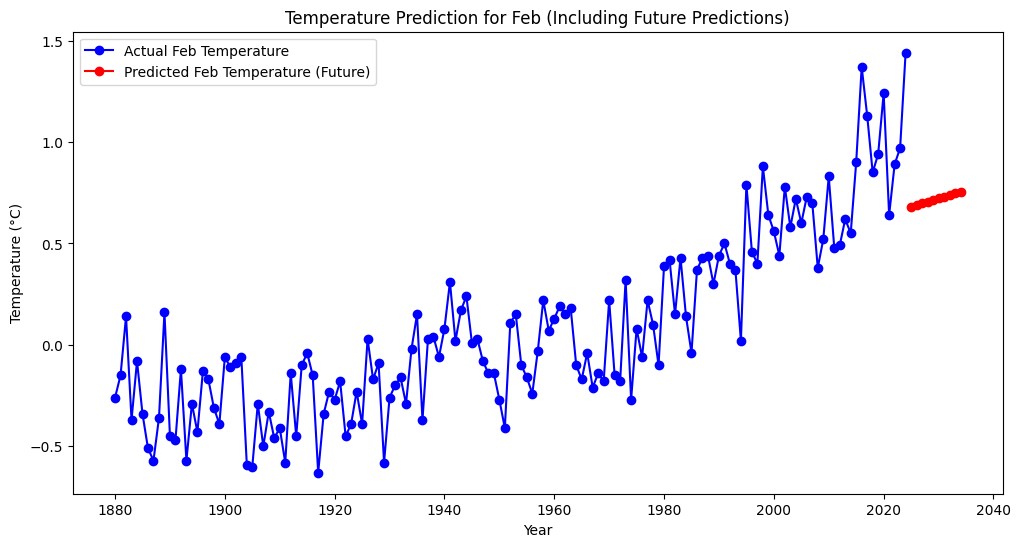

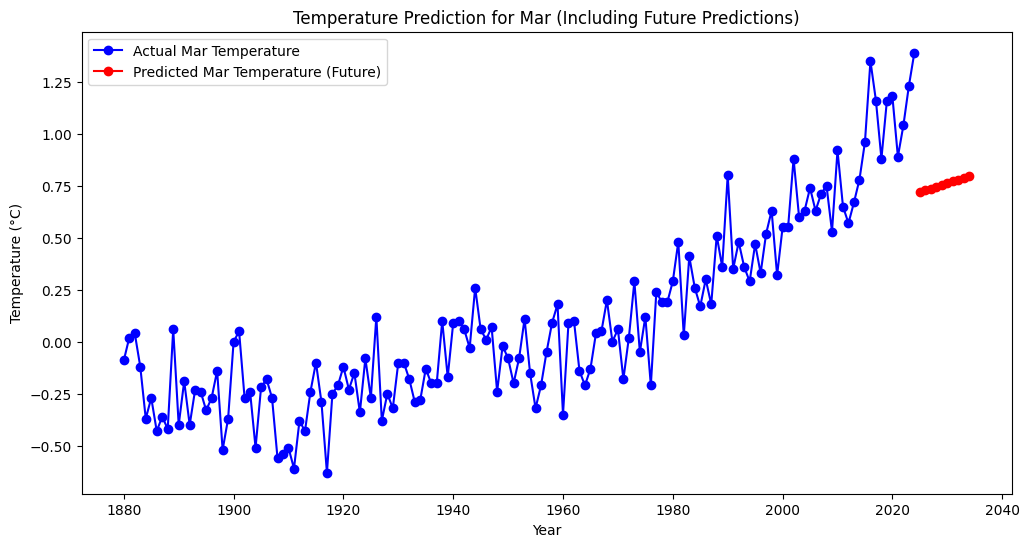

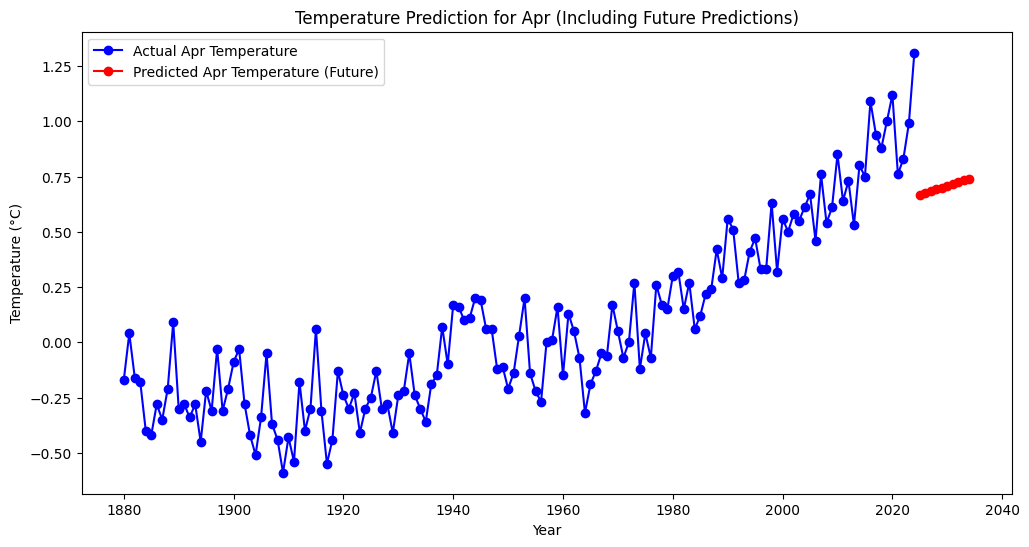

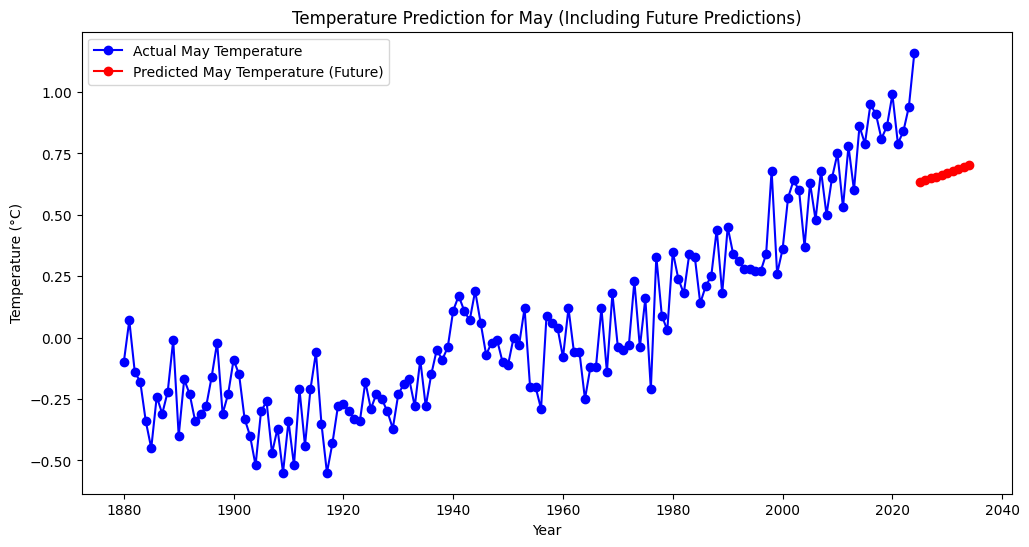

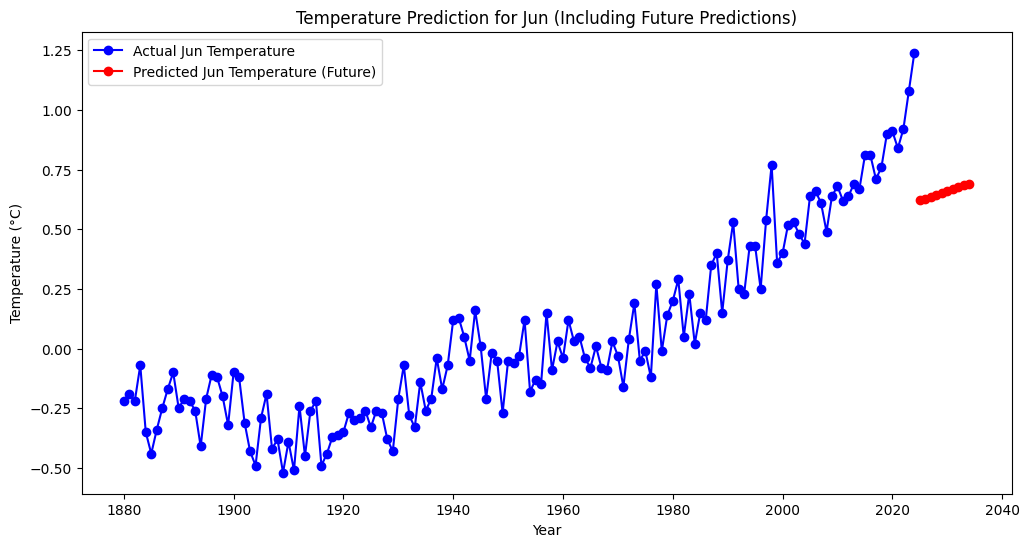

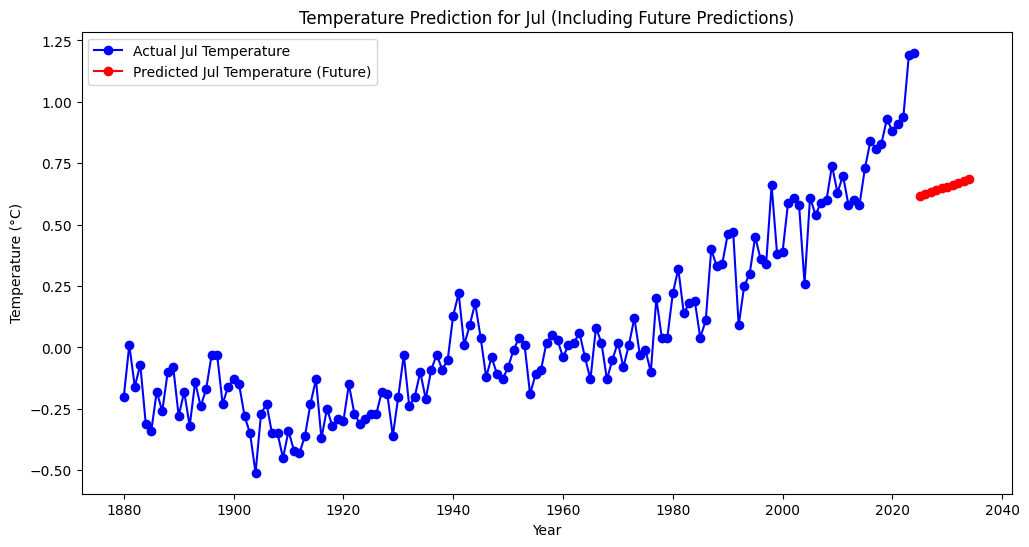

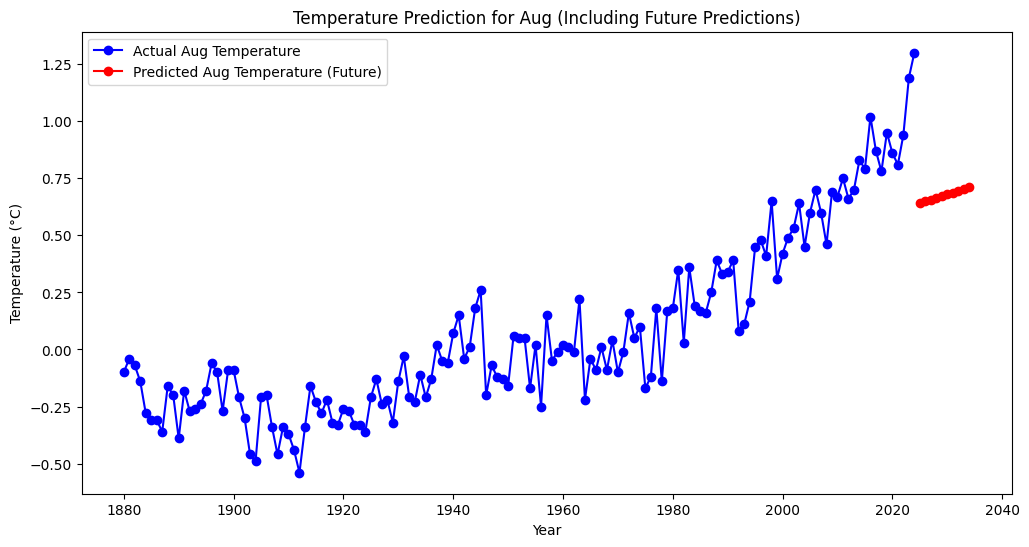

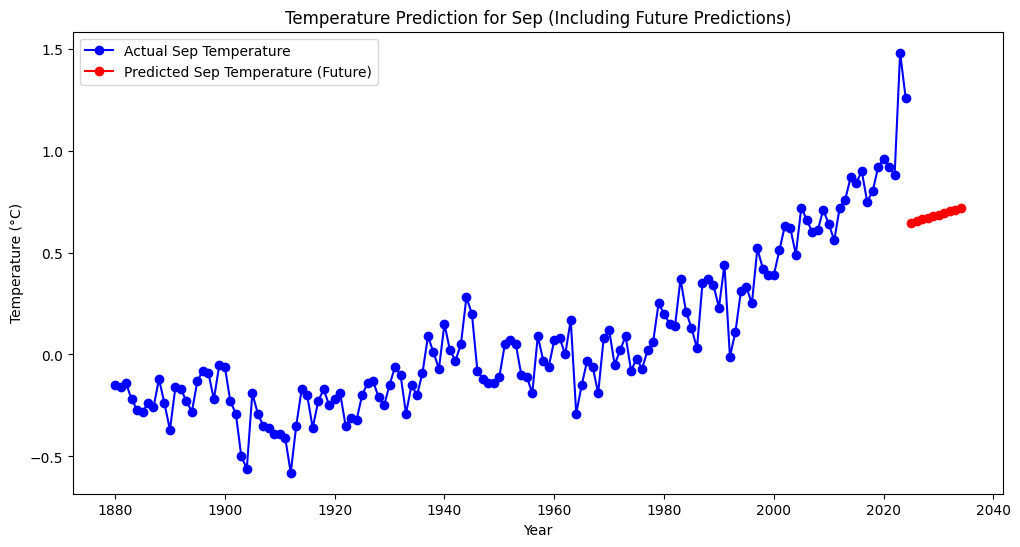

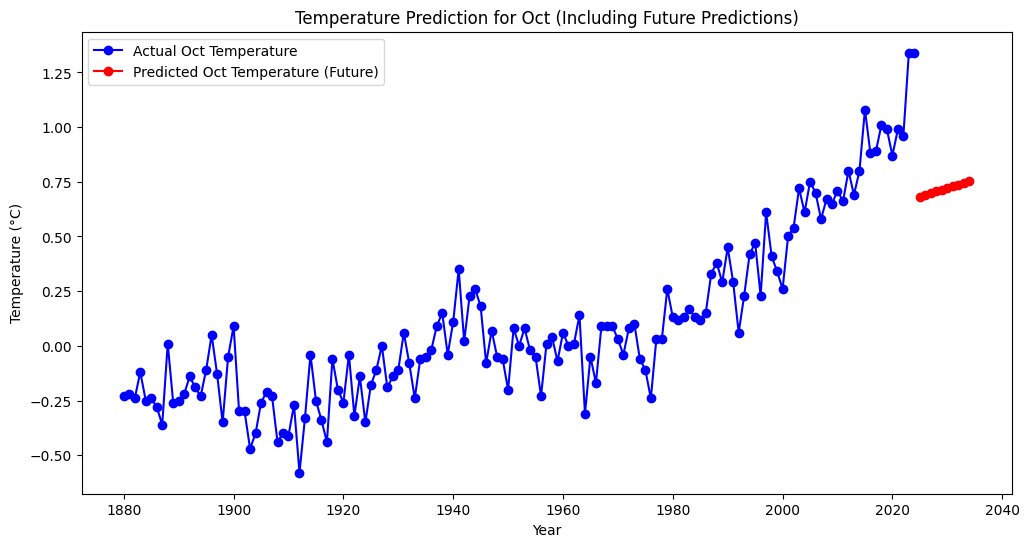

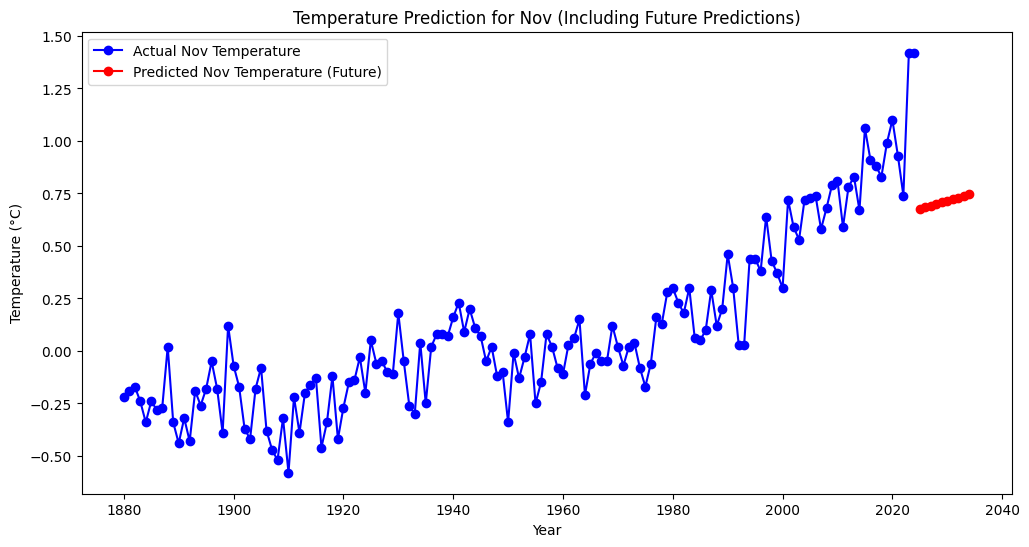

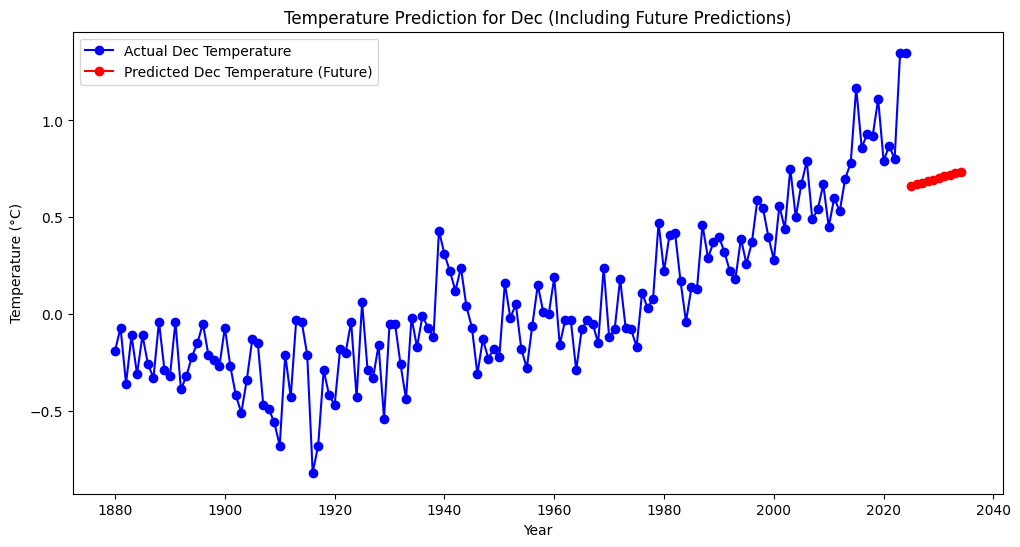

In [86]:
for i in columns:
    month = i
    
    # Prepare the data for the chosen month
    X = df.index.values.reshape(-1, 1)  # Years as features
    y = df[month].values                # Temperatures for the selected month

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    future_years = np.arange(df.index[-1] + 1, df.index[-1] + 11).reshape(-1, 1)  # Next 10 years
    future_predictions = model.predict(future_years)

    # Combine historical and future predictions for plotting
    #all_years = np.concatenate((df.index.values, future_years.flatten()))
    #all_temperatures = np.concatenate((y, future_predictions)) # type: ignore

    # Plot actual data and future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[month], label=f'Actual {month} Temperature', color='blue', marker='o', linestyle="-")
    plt.plot(future_years, future_predictions, label=f'Predicted {month} Temperature (Future)', color='red', marker="o")

    # Plot styling
    plt.title(f'Temperature Prediction for {month} (Including Future Predictions)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

    #plt.savefig(f"predictions_{i}.png")